In [1]:
import pandas as pd

In [2]:
#https://jalynne-kim.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4-%EC%A3%BC%EC%84%B1%EB%B6%84-%EB%B6%84%EC%84%9D-pca-principal-component-analysis-%EA%B3%BC-biplot-%EA%B0%9C%EB%85%90%EA%B3%BC-%EC%82%AC%EB%A1%80-%EB%A0%88%EB%93%9C%EC%99%80%EC%9D%B8-%EB%8D%B0%EC%9D%B4%ED%84%B0-437283592031
#pda 분석 주성분 해석방법

In [3]:
spd= pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\speed_not0.xlsx')
spd_ratio= pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\speed_ratio.xlsx')

incident=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\incident_new.xlsx')

TTI_1=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\link_char.xlsx',sheet_name='travel time index')
TTI_2=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\link_char.xlsx',sheet_name='travel time index_2')
#travel time index_1: 최고속도(95%)기준 통과시간-현재속도 기준 통과시간(speed_not0 파일 기준으로 계산)
#travel time index_2: 최고속도(95%)/현재속도(speed_not0 파일 기준으로 계산)

#green_volume_ratio=pd.read...
#green=
#queue_ratio=
#queue=

weather_temp=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\weather_temp.xlsx')
weather_rain=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\weather_rain.xlsx')
weather_wind=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\weather_wind.xlsx')
weather_humi=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\weather_humi.xlsx')

link_char=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\link_char.xlsx')

vol_total=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_total')
vol_thr=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_thr')
vol_left=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_left')
vol_right=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_right')
vol_uturn=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_uturn')
vol_veh=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_veh')
vol_bus_s=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_bus_s')
vol_bus_b=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_bus_b')
vol_truck_s=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_truck_s')
vol_truck_b=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_truck_b')
vol_motor=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_motor')
vol_ratio=pd.read_excel('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\volume_not0.xlsx',sheet_name='vol_ratio')
# vol_total에서 교통량을 lane으로 나눠줌
# 40352 공사중인데 교통량 있어서 lane 수 1로 가정


# 결측치 처리&확인

In [4]:
#speed는 결측된 시간에서 교통량이 0이라는 것을 확인하여 최고속도(95%)로 대치, 교통량은 빈 셀을 0으로 대치

In [5]:
spd[spd.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [6]:
spd_ratio[spd_ratio.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [7]:
incident[incident.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [8]:
TTI_1[TTI_1.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [9]:
TTI_2[TTI_2.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [10]:
weather_temp[weather_temp.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394
42664,2023-05-29 3:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42665,2023-05-29 3:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42666,2023-05-29 3:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42667,2023-05-29 3:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42668,2023-05-29 3:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51181,2023-06-27 17:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51182,2023-06-27 17:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51183,2023-06-27 17:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51184,2023-06-27 17:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
link_char[link_char.isnull().any(axis=1)]

,new avn,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [12]:
vol_total[vol_total.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [13]:
vol_thr[vol_thr.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [14]:
vol_left[vol_left.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [15]:
vol_right[vol_right.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [16]:
vol_uturn[vol_uturn.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [17]:
vol_veh[vol_veh.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [18]:
vol_bus_s[vol_bus_s.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [19]:
vol_bus_b[vol_bus_b.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [20]:
vol_truck_s[vol_truck_s.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [21]:
vol_truck_b[vol_truck_b.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [22]:
vol_motor[vol_motor.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [23]:
vol_ratio[vol_ratio.isnull().any(axis=1)]

,time,40221,40222,40223,40224,40231,40232,40233,40234,40241,...,40373,40374,40381,40382,40383,40384,40391,40392,40393,40394


In [24]:
data=[spd, spd_ratio, incident, TTI_1, TTI_2, weather_temp,weather_wind,weather_rain,weather_humi, vol_total, vol_thr, vol_left, 
      vol_right, vol_uturn,vol_veh, vol_bus_s, vol_bus_b, vol_truck_s,vol_truck_b,vol_motor,vol_ratio]
#link_char는 뺀다.

In [25]:
#로우 컬럼 수 확인
for df in data:
    print(df.shape)  #날씨 데이터 제외 다 맞음

(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)
(51552, 45)


# 데이터 표준화

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
data_name={'spd': spd, 'spd_ratio':spd_ratio,'incident':incident,'TTI_1':TTI_1, 'TTI_2':TTI_2, 
           'weather_temp':weather_temp, 'weather_rain':weather_rain, 'weather_wind':weather_wind, 'weather_humi':weather_humi, 
           'vol_total':vol_total, 'vol_thr':vol_thr, 'vol_left':vol_left, 'vol_right':vol_right, 'vol_uturn':vol_uturn, 
           'vol_veh':vol_veh,'vol_bus_s':vol_bus_s,'vol_bus_b':vol_bus_b, 'vol_truck_s':vol_truck_s,'vol_truck_b':vol_truck_b,
           'vol_motor':vol_motor,'vol_ratio':vol_ratio}
#link_char는 뺀다.


In [28]:
scalers = {}  # 스케일러를 저장할 딕셔너리
keys=list(data_name.keys())
scaled_data={}

In [29]:
for key in keys:
    df=data_name[key]
    scaler = StandardScaler()  # StandardScaler 객체 생성
    df.columns = df.columns.astype(str)
    print(key)
    try:
        df.set_index('time', inplace=True)
        
    except KeyError:
        print()
    
    scaled = scaler.fit_transform(df)  # 데이터 표준화
    scaled_ = pd.DataFrame(scaled)
    scalers[key] = scaler                    # 스케일러를 딕셔너리에 저장
    scaled_data[key]= scaled_                 # 스케일링 결과를 딕셔너리에 저장
    scaled_data[key].columns=df.columns

spd
spd_ratio
incident
TTI_1
TTI_2
weather_temp
weather_rain
weather_wind
weather_humi
vol_total
vol_thr
vol_left
vol_right
vol_uturn
vol_veh
vol_bus_s
vol_bus_b
vol_truck_s
vol_truck_b
vol_motor
vol_ratio


# 시계열 그래프 데이터 생성

In [30]:
spd['40222'].iloc[1]

9.0

In [31]:
# 시계열 그래프 데이터 생성
# (노드, 엣지, 시간대 정보 등)

In [32]:
axis1=['40353','40343','40333','40323','40313']        #연결 축(방향별로 각각 구성) // 엣지 생성 때 필요
axis2=['40351','40341','40331','40321','40311']

axis3=['40352','40372','40382','40233','40243']
axis4=['40354','40374','40384','40231','40241']

axis5=['40222','40244','40314']
axis6=['40312','40242','40224']

axis7=['40332','40391','40371']
axis8=['40373','40393','40334']

axis9=['40223','40234','40394','40344']
axis10=['40392','40232','40221']

axes = [axis1, axis2, axis3, axis4, axis5, axis6, axis7, axis8, axis9, axis10]

In [33]:
import networkx as nx

In [34]:
link_char.columns = link_char.columns.astype(str)

In [35]:
# 그래프 초기화
time_series_graphs = [] #여기에 저장됨

time_steps= spd.shape[0]

nodes=['40221', '40222', '40223', '40224', '40231', '40232', '40233', '40234',
       '40241', '40242', '40243', '40244', '40311', '40312', '40313', '40314',
       '40321', '40322', '40323', '40324', '40331', '40332', '40333', '40334',
       '40341', '40342', '40343', '40344', '40351', '40352', '40353', '40354',
       '40371', '40372', '40373', '40374', '40381', '40382', '40383', '40384',
       '40391', '40392', '40393', '40394']


for t in range(time_steps):
    
    G = nx.Graph()
    
    for node in nodes:
        
        feature=[]
        
        for key in keys: 
            df=scaled_data[key]
            feature.append(df[node].iloc[t])
       
    
        G.add_node(node, feature1=feature[0],feature2=feature[1],feature3=feature[2],feature4=feature[3],
                   feature5=feature[4],feature6=feature[5],feature7=feature[6],feature8=feature[7],
                   feature9=feature[8],feature10=feature[9],feature11=feature[10],feature12=feature[11],
                   feature13=feature[12],feature14=feature[13],feature15=feature[14],feature16=feature[15],
                   feature17=feature[16],feature18=feature[17],feature19=feature[18],feature20=feature[19],
                   feature21=feature[20])
        
        G.add_edge(node,node)   #Self loop 추가
    
    # 엣지 추가 
    for axis in axes:
        for j in range(len(axis)):
            try:
                G.add_edge(axis[j],axis[j+1], weight=1/(link_char[axis[j+1]].iloc[0]))
                #print(axis[j],axis[j+1])           #인접한 검지기만 엣지로 연결
                #print(link_char[axis[j+1]].iloc[0]) # 1/링크 거리를 인접행렬의 가중치로(1차 시도.. 향후 edge랑 가중치 다양하게 구성해보기) 
            
            except IndexError:
                break
                
    time_series_graphs.append(G)

In [36]:
# 시계열 그래프 데이터 확인
#for t, G in enumerate(time_series_graphs):
#    print(f"Time step {t+1}" : Nodes: {G.nodes()}, Edges: {G.edges()})

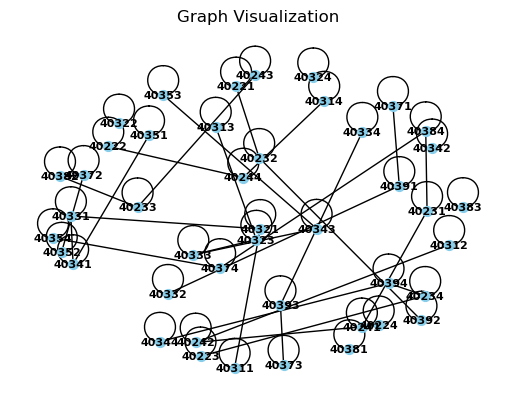

In [37]:
import networkx as nx
import matplotlib.pyplot as plt


G=time_series_graphs[7]
# 새로운 그림 생성
fig, ax = plt.subplots()

# 그래프 시각화
pos = nx.spring_layout(G)  # 노드 위치 결정 알고리즘 선택
nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', ax=ax)
plt.title("Graph Visualization")

# 그림 표시
plt.show()

In [38]:
#인접행렬 생성

In [39]:
#nx.write_adjlist(time_series_graphs[0],'graph.adj')

In [40]:
# # 인접리스트에 가중치 정보 추가

# G=time_series_graphs[0]
# adjlist_with_weights = []

# for u, v, data in G.edges(data=True):
#     adjlist_with_weights.append(f"{u} {v} {data.get('weight', 1.0):.6f}")

# # 파일에 저장
# with open('graph_with_weights.txt', 'w') as f:
#     for line in adjlist_with_weights:
#         f.write(line + '\n')

In [41]:
import numpy as np
import torch
import torch.nn as nn
import dgl.nn as dglnn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [42]:
import numpy as np
import dgl
import dgl.function as fn
import torch
import torch.nn as nn
from dgl.nn import GATConv
import networkx as nx


In [43]:

# NX 그래프를 DGL 그래프로 변환하는 함수
def nx_to_dgl(nx_graph):
    dgl_graph = dgl.from_networkx(nx_graph) 
    return dgl_graph

class GATModel(nn.Module):
    def __init__(self, in_feats, hidden_feats, num_heads):
        super(GATModel, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(dglnn.GATConv(
            in_feats, hidden_feats, num_heads=num_heads, residual=True))
        self.layers.append(dglnn.GATConv(
            hidden_feats * num_heads, hidden_feats, num_heads=num_heads, residual=True))

    def forward(self, g, features):
        for layer in self.layers:
            features = layer(g, features).flatten(1)
        return features

def graph_feature(G):
    x = torch.stack([torch.Tensor([G.nodes[node][f'feature{i+1}'] for i in range(num_features)]) for node in G.nodes])
    return x

In [44]:
num_features=21


# DGL 그래프 리스트 초기화
dgl_graphs = []
x_list=[]

# NX 그래프를 DGL 그래프로 변환
for nx_graph in time_series_graphs:
    dgl_graph = nx_to_dgl(nx_graph)
    dgl_graphs.append(dgl_graph)
    x=graph_feature(nx_graph)
    x_list.append(x)

In [45]:
dgl_graphs[0]

Graph(num_nodes=44, num_edges=102,
      ndata_schemes={}
      edata_schemes={})

In [46]:
# GAT 모델 하이퍼파라미터 설정
in_feats = 21  # 노드 피처의 차원 수
hidden_feats = 16  # GAT 레이어의 은닉 유닛 수
num_heads = 4  # GAT 레이어의 헤드 수

# 모델 초기화
model = GATModel(in_feats, hidden_feats, num_heads)

# 모델 학습 및 그래프 임베딩 생성

with torch.no_grad():
    for i, dgl_graph in enumerate(dgl_graphs):
        embeddings = model(dgl_graph,x_list[i])
        if i == 0:
            result_embeddings = embeddings.numpy()
        else:
            result_embeddings = np.vstack((result_embeddings, embeddings.numpy()))

print("DGL 그래프 임베딩 결과:")
print(result_embeddings)


DGL 그래프 임베딩 결과:
[[ 4.5905943  -3.6122935  -1.0926416  ...  2.755344    0.59891456
  -1.6752058 ]
 [ 4.48095    -3.87567    -0.55361116 ...  2.2007375   1.2996235
  -2.1000762 ]
 [ 4.3076673  -3.0755842  -0.02551609 ...  2.6384823   0.84400237
  -1.7640439 ]
 ...
 [ 1.2252467  -1.8800292  -3.5663435  ...  1.1694449  -0.16148996
  -1.7350159 ]
 [ 0.7681937  -0.6528957  -3.6701336  ...  1.1855727  -0.93564814
  -1.1676297 ]
 [-0.88571143 -1.7040963  -2.6858764  ...  0.12997717 -0.63677126
  -1.9734459 ]]


In [47]:
np.save('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\embedding_32.npy',result_embeddings)

In [48]:
np.savetxt('C:\\Users\\ajou\\Desktop\\Data\\dongtan\\embedding_32.txt',result_embeddings)

In [49]:
result_embeddings.shape

(2268288, 64)

In [50]:
2268288/44

51552.0

In [51]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np


In [52]:
def create_sequences_and_slice(data, input_seq_length, output_seq_length):
    sequences = []
    for i in range(len(data) - input_seq_length - output_seq_length + 1):
        input_seq = data[i:i+input_seq_length]
        output_seq = data[i+input_seq_length:i+input_seq_length+output_seq_length]
        sequences.append((input_seq, output_seq))
    
    return sequences

# 데이터를 7일치로 자르기
input_seq_length = 44 * 12 * 24 * 7  # 입력 시퀀스 길이 (7일치)
output_seq_length = 44 * 12 * 24  # 출력 시퀀스 길이 (1일치)


# 데이터를 입력 및 출력 시퀀스로 변환하고 자르기
sequences = create_sequences_and_slice(result_embeddings, input_seq_length, output_seq_length)

# 결과 확인
print(f"입력 데이터 크기: {result_embeddings.shape}")
print(f"생성된 시퀀스 개수: {len(sequences)}")
print(f"입력 시퀀스 크기: {sequences[0][0].shape}")
print(f"출력 시퀀스 크기: {sequences[0][1].shape}")

입력 데이터 크기: (2268288, 64)
생성된 시퀀스 개수: 2166913
입력 시퀀스 크기: (88704, 64)
출력 시퀀스 크기: (12672, 64)


In [53]:
sequences[0][0].shape

(88704, 64)

In [54]:
# 모델 정의 (하이퍼파라미터에 맞게 수정 필요)
class Seq2SeqModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Seq2SeqModel, self).__init__()
        self.encoder = nn.GRU(input_size, hidden_size, batch_first=True)
        self.decoder = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, _ = self.encoder(x)
        x, _ = self.decoder(x)
        output = self.fc(x)
        return output

In [55]:
output.shape

NameError: name 'output' is not defined

In [ ]:
# 데이터를 훈련 및 테스트 세트로 분할
split_ratio = 0.8  # 훈련 데이터 비율
split_index = int(len(sequences) * split_ratio)
train_data, test_data = sequences[:split_index], sequences[split_index:]

In [ ]:
train_data[0][0].shape

(88704, 256)

In [ ]:
train_data[0][1].shape

(12672, 256)

In [ ]:
# DataLoader를 사용하여 데이터를 미니배치로 로드
batch_size = 44
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
# 모델 초기화

input_size = 256  # 각 시퀀스의 요소당 차원
hidden_size = 16  # GRU hidden layer 크기
output_size = 256  # 각 시퀀스의 요소당 차원
model = Seq2SeqModel(input_size, hidden_size, output_size)

#시퀀스의 길이는 데이터로부터 자동으로 유추됨

In [ ]:
# 손실 함수 및 최적화 알고리즘 설정
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        
#         batch_x = torch.tensor(batch_x, dtype=torch.float32)
#         batch_y = torch.tensor(batch_y, dtype=torch.float32)
        
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}')

# 모델 평가 코드 (테스트 데이터에 대해 평가)
model.eval()
test_loss = 0
with torch.no_grad():
    for batch_x, batch_y in test_loader:
#         batch_x = torch.tensor(batch_x, dtype=torch.float32)
#         batch_y = torch.tensor(batch_y, dtype=torch.float32)
        
        output = model(batch_x)
        loss = criterion(output, batch_y)
        test_loss += loss.item()

print(f'Test Loss: {test_loss:.4f}')


RuntimeError: [enforce fail at C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\c10\core\impl\alloc_cpu.cpp:81] data. DefaultCPUAllocator: not enough memory: you tried to allocate 3996647424 bytes.

In [ ]:
#  이건transformer 코드

In [ ]:



data = result_embeddings  # 가상의 시계열 데이터 생성

# 하이퍼파라미터 설정
input_seq_length = 24  # 입력 시퀀스 길이
output_seq_length = 1  # 출력 시퀀스 길이
batch_size = 64
num_epochs = 50
learning_rate = 0.001

# 데이터를 입력 및 출력 시퀀스로 변환
def create_sequences(data, input_seq_length, output_seq_length):
    sequences = []
    for i in range(len(data) - input_seq_length - output_seq_length + 1):
        input_seq = data[i:i+input_seq_length]
        output_seq = data[i+input_seq_length:i+input_seq_length+output_seq_length]
        sequences.append((input_seq, output_seq))
    return sequences

sequences = create_sequences(data, input_seq_length, output_seq_length)

# 데이터를 훈련 및 테스트 세트로 분할
train_data, test_data = train_test_split(sequences, test_size=0.2, random_state=42)

# DataLoader를 사용하여 데이터를 미니배치로 로드
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Transformer 모델 정의
class Transformer(nn.Module):
    def __init__(self, input_size, output_size):
        super(Transformer, self).__init__()
        self.encoder = nn.Transformer(input_size, 64, num_layers=2, num_heads=4)
        self.decoder = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 모델 초기화
model = Transformer(input_seq_length, output_seq_length)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 훈련 루프
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        inputs = inputs.permute(1, 0, 2)  # 배치 차원을 앞으로 이동
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}')

# 테스트 루프
model.eval()
test_loss = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.permute(1, 0, 2)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

print(f'Test Loss: {test_loss:.4f}')

# 모델을 사용하여 (t+12*24) 동안의 시계열 예측 수행
input_sequence = data[-input_seq_length:]  # 예측을 위한 입력 시퀀스
input_tensor = torch.tensor(input_sequence, dtype=torch.float32).unsqueeze(1).unsqueeze(0)  # 배치 차원 추가

model.eval()
with torch.no_grad():
    for _ in range(12*24):
        output = model(input_tensor)
        next_time_step = output[-1].item()
        input_sequence = np.roll(input_sequence, -1)  # 입력 시퀀스 업데이트
        input_sequence[-1] = next_time_step
        input_tensor = torch.tensor(input_sequence, dtype=torch.float32).unsqueeze(1).unsqueeze(0)

print("예측 결과:", input_sequence)
